## Natural Language Processing - Summer Term 2024
### Hochschule Karlsruhe
### Lecturer: Prof. Dr. Jannik Strötgen
### Tutor: Paul Löhr

GRUPPE:
- Oliver Dawson
- Lea Gierke
- Johannes Gross
- Simon Hilpp

# Exercise 01

### You will learn

- how to get the infrastructure up and running
- how you will complete the exercises


- about some different data formats
- how to write a simple data parser
- analyze text occurrences.

## Task 0.1 - Introduction (0 P):

- learn about global and local environments
- create a new local environment and add it to jupyter notebook
- installed the dependencies in requirements.txt for each exercise
- start jupyter notebook or jupyter-lab, switch the kernel to your environment and start solving


This assumes:
- you already have Python 3.9 installed
- you have Jupyter Notebook or Jupyterlab installed
- Python and Jupyter Notebook are already included in Anaconda, which we recommend due to the ease of installation. You can, however, also install them manually.


### Decide between local environment and global installation

When Python is installed, it is installed globally, meaning that all users and applications use the same version and, more importantly, the same version of packages (libraries). As we might have some applications that run only with a specific version of a library, it is hard and sometimes impossible to resolve version conflicts system-wide.

Therefore it is possible to create *environments*, of which you can think of as encapsulated copies of the python interpreter and a set of specific versions of packages (the idea of containerization before and during the earliest years of docker). It is customary to specify the versions in a file called `requirements.txt`, which lists the package name `wordcloud`.

**We strongly recommend creating environments to avoid global version conflicts.**

That said, nothing prevents you in principle to just install the required packages in the global namespace. We will use the latest version of packages (as listed on https://pypi.org/) and are unlikely to encounter version conflicts. We will not deduce points for using a global installation per se, but note that when version conflicts occur, this falls within your responsibility. When your submission is not executable due to this, this is obviously not helpful.

### Create an environment and make it usable in Jupyter Notebook

Using your global installation, start a terminal in the top folder where you store your exercises. Then execute the following commands in a shell:

```
# creates the environment in the folder .env
python -m venv .env            

# activate the environment
source .env/bin/activate   # for linux only
.env\Scripts\activate.bat      # for windows only

# add the jupyter kernel to the environment
pip install ipykernel

# add your environment to jupyter notebook
python -m ipykernel install --name=.env
```

### What you have now

You now have:

 - a new environment called .env in your top exercise folder
 - added the environment to the (global) jupyter notebook settings
 
 
You now can:
 
 - **configure your local environment** as you like, for example, install specific packages (**for each exercise**)
 - **start jupyter notebook globally** and change the kernel to use your local environment via Kernel->Change Kernel>.env in the top menu bar. **Then you can start to solve your exercise.**

While it would be maybe more intuitive to execute jupyter notebook *within* the environment, this is the least cumbersome way..

### Configure your environment
##### Install requirements within the environment
by typing the following command in a terminal in this directory

`source .env/bin/activate`   # windows: `.env\Scripts\activate.bat`

`pip install -r requirements.txt`  # distributed with the latest exercise

*This is also necessary when the dependencies have changed!*

### Start Jupyter Notebook (Jupyterlab) within this environment

Close this window, close the previous terminal session and type

`jupyter notebook` or `jupyter-lab`

in a new terminal.

- *Select your current exercise ipynb file*
- *Change the kernel* to use your .env via Kernel->Change Kernel>.env 

*This is required every time to start up your exercise when coding.*

## Task 0.2 - How to solve the exercises (0 P):

The upcoming exercises contain both code submission as well as written answers.

### Code-Submission

For these assignments, you complete the template code that we already provide you within this notebook. For example and exercise might look like this:

In [2]:
def square(x):
    # Assignment XY: calculate the square here and return the value
    pass

Then you are expected to complete the missing functionality. In this case, the function might look like this:

In [3]:
def square(x):
    return x*x

And to check, we can even call the function and get a result:

In [4]:
square(4)

16

### Structure your code within external python files

While you can solve all coding directly within the jupyter notebook, it is also possible to include external python files from the containing directory.

For this to work, you have to enable live edit capabilities by executing the following commands in your jupter notebook:
```
%load_ext autoreload
%autoreload 
```
Then you can include files like `util.py` by just importing them with `import util`.

**In principle, we recommend completing all your exercises within the notebook wherever possible and only include external files when strictly necessary!**

**Beware:** *If you include any extern files, please always ensure that you submit your solutions as an archive, which includes both the ipynb file and all the referenced files! Otherwise, we ***cannot*** grade them.* 

### Text-Submissions
Another type of submissions is a text submission. Here you are asked for a written answer.

*Tip*: You can use Markdown formatting if you set the cell type in the top menu bar to `Markdown`!

**To edit a cell, you can double-click it.**

For example, in the following case:

*Question*: What is Python?

\# ANSWER HERE (Double click to edit)

we expect you to write your answer in this cell (or several, if you chose to do so), like this:

Python is an interpreted, high-level, general-purpose programming language and commonly used in data science.

#### Markdown Support
Please use the markdown syntax to make your submission more readable!

Here are some examples:

##### Headings

*italic*

**bold**

\*literal asterisks\*

Latex code: $e^{i\pi} + 1 = 0$


Nice python styles (not for code submission!!)
```python
print "Hello World!"
```

tables

| This | is   |
|------|------|
|   a  | table|

### Include Images
If you need to include external images (not any visualizations computed inside this notebook), you can reference the file like this:


![my image 123](cat.jpg)


**Beware:** *If you include any extern files, please always ensure that you submit your solutions as an archive, which includes both the ipynb file and all the referenced files! Otherwise, we **cannot** grade them.

This concludes the short precursor, and we can start with the real exercises.

---

## Task 1 - Data Description (10P):

We provided some data files together with this assignment. These data files have a specific structure with some meta-information. Study the files and try to understand what they contain. Then try to make some sense out of this information.
Prepare a short description of the data in written form naming interesting facts (e.g., what kind of data are you seeing, how is it encoded).

Hint: It might help to read the text a little to understand what the data is all about.

### Datenset 1: Debates
The data consists of three .xml files. It looks like a export from a transcript-program. The files show transcripts from the interview. Each file has its own section/topic "First Trump vs. Clinton Debate". Each tag differs between the person who is speaking "clinton", "trump" and the "moderator" and even has an specific id. The transcript even uses "..." or " - " to emphasize a pause in the speech.

### Datenset 2: Reddit

The redditdump is a json file (JavaScript Object Notation) which is a common data storage format because it tends to be easier to parse thanks to being relatively intuitive in its structure. 
The key-value pairs in the json data reflect the reddit lingo for its features like subreddits and upvotes etc. We can see that these contain strings, integers, booleans, floats, and empty lists and dictionaries. We can see that the data has a very deep nesting of its respective child objects, which reflects reddit comments as they can be published under a parent comment of any nested depth. This creates a challenge to iterate over everything correctly. We can use a recursive-function approach to deal with these issues.

### Datenset 3: TV

The tv dataset consists of seven .csv files. The name introduces a timestamp "2016" and on three different days "9_26" "10_09" and "10_19". All tables have the same columns. Some columns have the same content. The most important column is the "transcript" one. This time, the transcript shows the start and the end time of every utterance.


expected approx. 200-500 words

## Task 2 - Data Parser Implementation (10 P):

Use the provided framework that you have now in your project. Write a reader to read in the data files and the appropriate data structures that you need in the beginning. You may only need to store things in your data structure that you will need later (e.g., lots of attributes in the reddit dump are useless for us).

Follow the instructions in the following code snippets.

In [3]:
# import the necessary library functions we prepared
from utils import create_word_cloud, read_lorem_ipsum_text
from bs4 import BeautifulSoup
import os
import json
import csv
import pandas as pd

In [6]:
#
# Part 1
#
#  - Read all the files in the data directory (and subdirectories)
#
# You may use any available library here, but please add it to the requirements.txt and SUBMIT the changed file
# Create python classes to represent your data. For the beginning, the simple text body should be sufficient.
# However, if you want to add other metadata you are free to do so.
# Regard each folder as one dataset. So in Part 3, you should generate three additional word clouds.
# 
# Hint: You do _not_ need to represent the thread structure of the reddit data with your Python class instances.
# 
# Example:


def read_debate_text():
    concatenated_data = ''
    for filename in os.listdir("data/debates"):
        with open('data/debates/'+filename, 'r', encoding="utf8") as f:
            data = f.read()
        soup = BeautifulSoup(data, "html.parser")
        utterances = soup.find_all('utterance')
        list = []
        for utter in utterances:
            list.append(utter.text)
        combined_text = ' '.join(list)
        # combined_text.replace("\n","")
        clean_text = combined_text.replace("\n", "")
        concatenated_data += clean_text
    return concatenated_data

def read_reddit_text():
    text = []
    with open('data/reddit/redditdump.json', encoding="utf8") as f:
        data = json.load(f)
    #print(data)
    # Access a specific child element
    for listing in data:
        #print(listing["data"]["children"])
        for children in listing["data"]["children"]:
            #print(children)
            if children["kind"] == "t3":
                text.append(children["data"]["selftext"])
            if children["kind"] == "t1":
                text.append(children["data"]["body"])
    combined_text = ' '.join(text)
    clean_text = combined_text.replace("\n", "")
    #print(clean_text)
    return clean_text

def read_tv_text():
    dfs = []
    for filename in os.listdir("data/tv"):
        filepath = os.path.join("data/tv", filename)
        df = pd.read_csv(filepath)  # Read the CSV file into a dataframe
        dfs.append(df)
    concatenated_df = pd.concat(dfs, ignore_index=True)
    #print(concatenated_df["transcript"])
    text = concatenated_df['transcript'].str.cat(sep=' ')
    print(text)
    return text


#csv_reader(r'C:\Users\dawso\OneDrive\Dokumente\GitHub\NLP\data\tv\2016_09_26_first_presidential_full_cable_1476407859_raw.csv')


loremipsum = read_lorem_ipsum_text()
    
# TODO - ADD YOUR OTHER READER HERE
debates = read_debate_text()
reddit = read_reddit_text()
tv = read_tv_text()


C:\Users\dawso\AppData\Local\Programs\Python\Python312\Lib\html\parser.py:171: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


THE TERMS WERE LAID OUT. I WROTE -- >> YOU CALLED IT THE GOLD STANDARD. >> DONALD, I KNOW YOU LIVE IN YOUR OWN REALITY -- >> OH, YEAH. WEALTHIEST AMERICANS, SECRETARY CLINTON. >> I HAVE A FEELING BY THE END OF THIS THAT ARE INEFFECTIVE. STOP AND FRISK WAS FOUND TO BE UNCONSTITUTIONAL AND IN PART BECAUSE IT WAS TO SAY. SYDNEY BLUMENTHAL WORKS FOR THE CAMPAIGN AND VERY CLOSE FRIEND OF SECRETARY CLINTON. AND HER CAMPAIGN MANAGER, PATTI DOYLE, WENT TO -- DURING THE CAMPAIGN, HER CAMPAIGN AGAINST PRESIDENT OBAMA, FOUGHT VERY HARD, AND YOU CAN GO LOOK IT UP AND YOU CAN CHECK IT OUT AND IF YOU LOOK AT CNN THIS PAST WEEK, PATTI DOYLE WAS ON "WOLF BLITZER" SAYING THAT THIS HAPPENED. BLUMENTHAL SENT McCLATCHY, HIGHLY RESPECTED REPORTER, TO KENYA TO FIND OUT ABOUT IT. THEY WERE PRESSING IT >> WELL, JUST LISTEN TO WHAT YOU HEARD. AND CLEARLY AS DONALD JUST ADMITTED, HE KNEW HE WAS GOING TO STAND ON THIS DEBATE STAGE AND LESTER HOLT WAS GOING TO BE ASKING US QUESTIONS, SO HE TRIED TO PUT THE WHOLE 

In [9]:
# 
# Part 2
#
#  - Count the words in a map. Do so for each dataset.
#
# Example:
word_count_lorem = {}
words = loremipsum.split(" ")
for word in words:
    word_count_lorem[word] = word_count_lorem.get(word, 0) + 1
#print(word_count_lorem)

# TODO - ADD YOUR OTHER COUNTER FUNCTIONS HERE
    
def count_words(text):
    word_count = {}
    words = text.split(" ")
    for word in words:
        word_count[word] = word_count.get(word, 0) + 1
    return word_count
# 
word_count_debate = count_words(debates)
word_count_reddit = count_words(reddit)
#word_count_reddit = count_words(tv)
print(word_count_reddit )

{'The': 5, 'first': 5, 'Presidential': 4, 'Debate': 4, 'for': 23, 'the': 100, '2016': 1, 'Elections': 1, 'will': 27, 'air': 1, 'tonight': 3, 'at': 11, '9:00PM': 1, 'Eastern': 1, 'Hofstra': 1, 'University': 1, 'in': 31, 'New': 1, 'York.': 1, 'debate': 10, 'feature': 1, 'Donald': 7, 'Trump': 23, 'and': 56, 'Hillary': 9, 'Clinton': 8, 'their': 5, 'head-to-head': 1, 'televised': 1, 'debate.': 4, 'be': 20, '90': 2, 'minutes': 2, 'commercial': 1, 'free.The': 1, 'is': 29, 'hosted': 2, 'by': 9, 'Commission': 2, 'on': 19, 'Debates': 2, 'moderated': 1, 'NBC’s': 1, 'Lester': 1, 'Holt.': 1, '[receive': 1, 'question](https://twitter.com/CBSNews/status/780506360257675264).-----**Where': 1, 'to': 63, 'Watch**-Unlike': 1, 'primaries,': 1, 'these': 2, 'debates': 3, 'are': 16, 'broadcast': 2, 'not': 18, 'restricted': 1, 'one': 4, 'network,': 1, 'making': 2, 'a': 49, 'wide': 1, 'range': 1, 'of': 32, 'viewing': 1, 'options.': 1, 'Here': 1, 'just': 12, 'few': 2, 'ways': 1, 'you': 11, 'can': 2, 'watch:**Tel

Lorem ipsum:


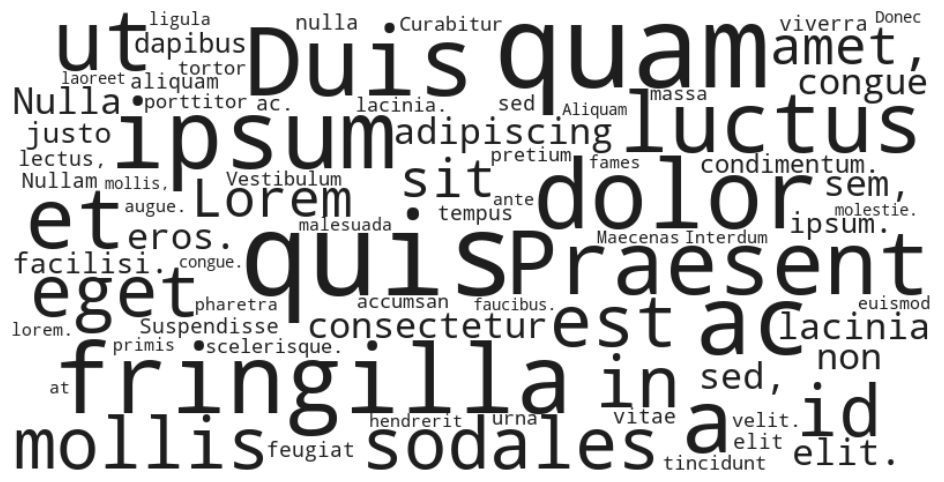

In [56]:
# 
# Part 3
#
#  - Create a word cloud for the dataset.
# 
# Example:
create_word_cloud(word_count_lorem, "Lorem ipsum")
# TODO - CREATE THE OTHER THREE WORDCLOUDS HERE

### Wordcloud 1: Debates (xml)

Debate:


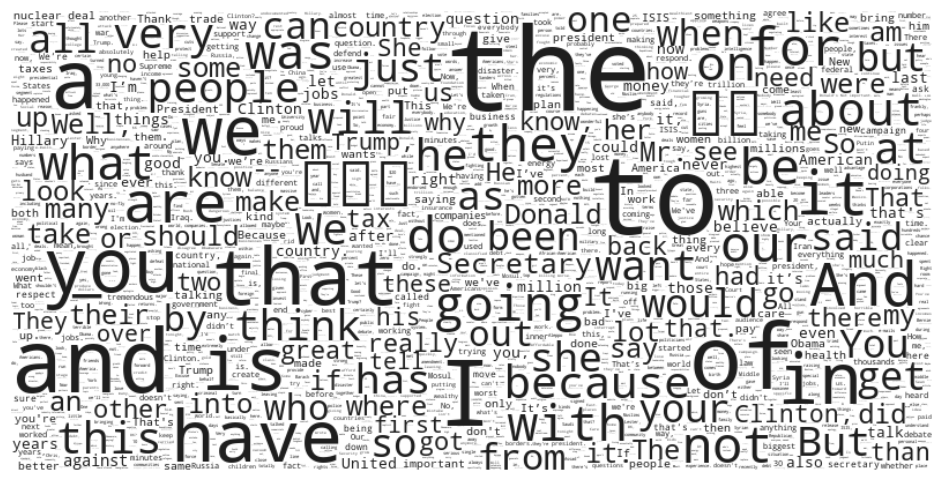

In [60]:
create_word_cloud(word_count_debate, "Debate")

### Wordcloud 2: Reddit (json)

Reddit:


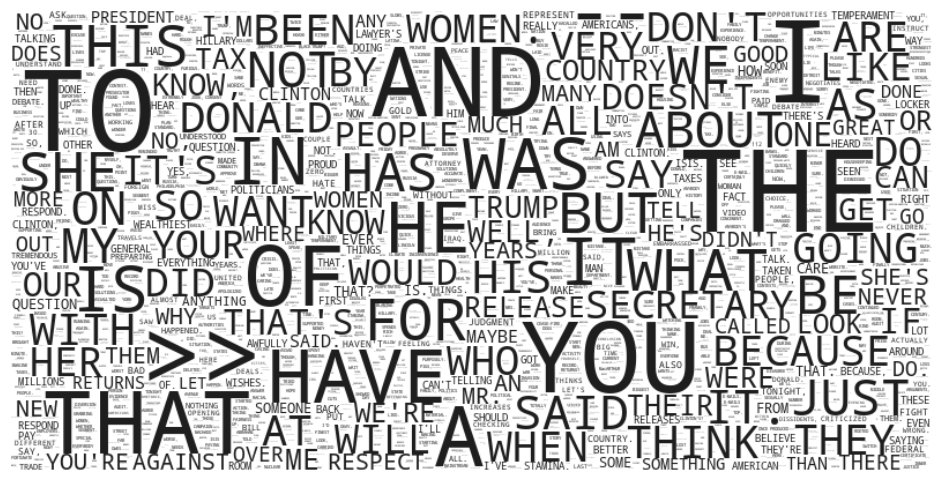

In [61]:
create_word_cloud(word_count_reddit, "Reddit")

### Wordcloud 3: TV (csv)

TV:


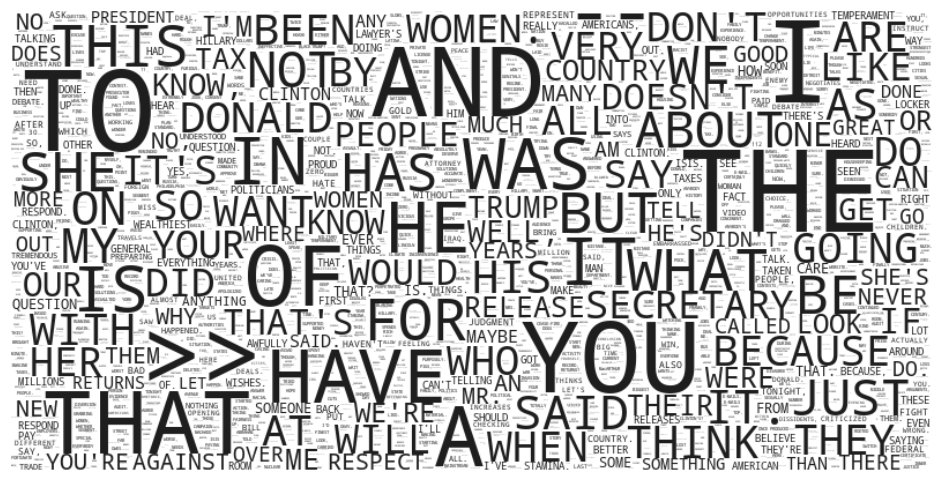

In [62]:
create_word_cloud(word_count_reddit, "TV")

## Task 3 - Word-Cloud Interpretation and Next Steps (10 P):

Interpret the word clouds you created. Can you tell any differences from the different data sets? What do you think would be the next steps to improve the word clouds?

Reference the corresponding figure and write down your interpretation.

\# TEXT SUBMISSION ANSWER - expected approx. 250-600 words



### Differences in Data Sets
The data sets are in various formats, each encoded differently. This means, we have to use of different Python modules for processing, such as xml, json, and csv. XML files, for instance, need iterating through various XML tags to extract relevant information.
The structure of nested JSON adds complexity, requiring the implementation of recursive methods to get the data hierarchy and retrieve all comments within a thread.
Handling .csv files entails considerations of both rows and columns, making the pandas module indispensable for efficient data manipulation and analysis.

### Improvements
Each data format have different challenges when generating word clouds. For instance, while parsing the xml files, we have to take care to extract meaningful text content from within the XML tags, excluding any markup or structural elements that may distort the word cloud.
Similarly, dealing with nested JSON structures demands a comprehensive approach to ensure all relevant comments are captured, especially in multi-threaded discussions where comments may be deeply nested within parent threads. This means we need recursive functions to account for any depth in nesting. In contrast, processing .csv files involves organizing the data into a format suitable for word cloud generation, which means we need to filter out irrelevant syntax and symbols and focus solely on textual content. The Pandas Module is useful to structure the data into a table to mirror its form in the csv and then we can work on it more effectively.

### Interpretation
One notable improvement in word cloud generation across all data formats is the need to remove syntax symbols and non-textual elements from the word cloud.
Therefore the word cloud represents the content of the text, without distortion from symbols like ">". Additionally, observing Zipf's law in action within the word cloud highlights the importance of handling stop words effectively. By filtering out common stop words like "the" "and" "of" and prioritizing content-bearing terms based on their frequency, we can enhance the information we get from the word clouds and gain a better insight of the text.

---

#### Submitting your results:

To submit your results, please:

- save this file, i.e. `ex01_assignment.ipynb`.
- if you reference any external files (e.g., images), please create a zip or rar archive and put the notebook files and all referenced files in there.
- login to ILIAS and submit the `*.ipynb` or `*.zip` archieve for the corresponding assignment.

**Remarks:**
    
- Do not copy any code from the Internet. In case you want to use publicly available code, please, add the reference to the respective code snippet.
- Check your code compiles and executes, even after you have restarted the Kernel (Menu -> Kernel -> Restart & Run all).
- Submit your written solutions and the coding exercises within the provided spaces and not otherwise.
- Write the names of your partner and your name in the top section.